In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

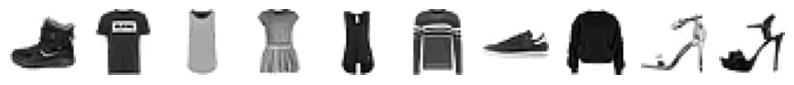

In [3]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r: 현재색반전  0  255
    axs[i].axis('off')                          # 그래프의 눈금을 제거
plt.show() 

In [4]:
train_input.shape

(60000, 28, 28)

In [5]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten층에서 사이즈 그대로 적용(28,28)

In [6]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [7]:
# 머신러닝
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델구성확인  model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)


In [8]:
train_scaled.shape

(48000, 28, 28)

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

epochs = 20 훈련세트 정확도가 높아짐

검증세트를 가지고 정확도를 측정

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마 loss,accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7743 - loss: 0.6533
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8578 - loss: 0.4015
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8702 - loss: 0.3510
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8814 - loss: 0.3264
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8881 - loss: 0.3020
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2930
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.2743
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9012 - loss: 0.2629
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9045 - loss: 0.2555
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9083 - loss: 0.2472
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9096 - loss: 0.2407
Epoch 12/20
1500/1500 ━━━━━━━━

In [12]:
# history keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [13]:
history.history['loss']
history.history['accuracy']

[0.8190000057220459,
 0.859541654586792,
 0.8727291822433472,
 0.8819166421890259,
 0.8874375224113464,
 0.8925416469573975,
 0.8971874713897705,
 0.9009583592414856,
 0.9044791460037231,
 0.9075000286102295,
 0.9106041789054871,
 0.9120416641235352,
 0.9156041741371155,
 0.9177708625793457,
 0.9206666946411133,
 0.9234791398048401,
 0.9248958230018616,
 0.9269999861717224,
 0.9275000095367432,
 0.9308958053588867]

In [14]:
# train세트 검증데이터(loss,accuracy) 그래프 - history

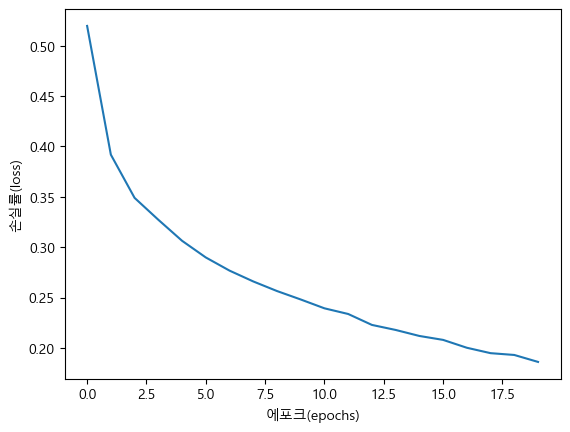

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

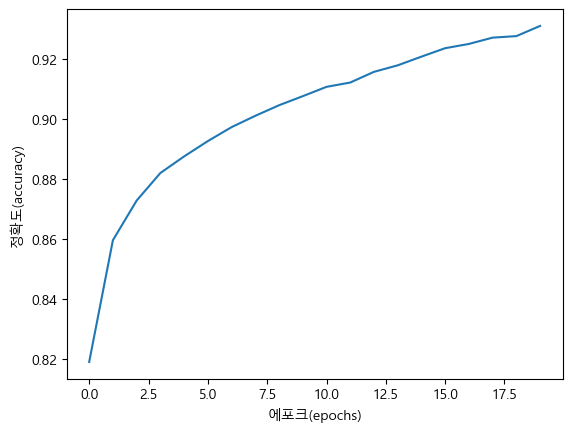

In [16]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

In [17]:
# 테스트 세트도 함께 검증 - histroy

In [18]:
model.evaluate(val_scaled,val_target) #test데이터를 가지고 검증

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - loss: 0.3288


[0.32692334055900574, 0.8913333415985107]

In [19]:
# 패션mlist 딥러닝을 구현하시오.


# 변경
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)